# Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Gold Price.csv",parse_dates=["Date"],index_col=["Date"])

# Data Collection

In [3]:
dataset

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2017-02-06,0.79,0.79,0.76,0.76,0.790000,7430.0,7.0,5848.0,7430.0,100.00,0.03,-0.03
2017-02-03,0.79,0.79,0.79,0.79,0.790000,310.0,4.0,244.0,310.0,100.00,0.00,0.00
2017-02-02,0.83,0.83,0.83,0.83,0.830000,75.0,1.0,62.0,75.0,100.00,0.00,0.00
2017-01-31,0.87,0.87,0.87,0.87,0.870000,1050.0,2.0,913.0,1050.0,100.00,0.00,0.00
2017-01-25,0.91,0.91,0.91,0.91,0.910000,400.0,1.0,364.0,400.0,100.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-07,65.55,71.00,57.60,65.25,64.071524,42741.0,286.0,2738481.0,14444.0,33.79,13.40,-0.30
2009-12-04,84.95,84.95,66.30,71.95,73.919145,133820.0,430.0,9891860.0,82395.0,61.57,18.65,-13.00
2009-12-03,72.00,72.00,65.20,70.80,71.469977,84551.0,368.0,6042858.0,61676.0,72.95,6.80,-1.20


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1660 entries, 2017-02-06 to 2009-12-01
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       1660 non-null   float64
 1   High                       1660 non-null   float64
 2   Low                        1660 non-null   float64
 3   Close                      1660 non-null   float64
 4   WAP                        1660 non-null   float64
 5   No. of Shares              1660 non-null   float64
 6   No. of Trades              1660 non-null   float64
 7   Total Turnover             1660 non-null   float64
 8   Deliverable Quantity       1660 non-null   float64
 9   % Deli. Qty to Traded Qty  1660 non-null   float64
 10  Spread H-L                 1660 non-null   float64
 11  Spread C-O                 1660 non-null   float64
dtypes: float64(12)
memory usage: 168.6 KB


In [5]:
stkdata=dataset[['Open','High','Low','Close']]

In [6]:
stkdata

,Open,High,Low,Close
Date,,,,
2017-02-06,0.79,0.79,0.76,0.76
2017-02-03,0.79,0.79,0.79,0.79
2017-02-02,0.83,0.83,0.83,0.83
2017-01-31,0.87,0.87,0.87,0.87
2017-01-25,0.91,0.91,0.91,0.91
...,...,...,...,...
2009-12-07,65.55,71.00,57.60,65.25
2009-12-04,84.95,84.95,66.30,71.95
2009-12-03,72.00,72.00,65.20,70.80


# Data Preprocessing

In [7]:
column='High'

ms=MinMaxScaler()
data1=ms.fit_transform(stkdata[[column]])
print("Length : ",data1.shape)

Length :  (1660, 1)


# Train&Test Set Split

In [8]:
training_size=round(len(data1)*0.80)
print("Training Size : ",training_size)
x_train=data1[:training_size]
x_test=data1[training_size:]
print("x_train length : ", x_train.shape)
print("x_test length : " , x_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length : ", y_train.shape)
print("y_test length : " , y_test.shape)

Training Size :  1328
x_train length :  (1328, 1)
x_test length :  (332, 1)
y_train length :  (1328, 1)
y_test length :  (332, 1)


# Model Creation and Validation

In [9]:

#trends=['n','t','c','ct']
orders=[(1,1,1),(1,1,2),(2,2,1),(2,1,1)]
for od in orders:
    model=ARIMA(x_train,order=od)
    model_fit=model.fit()
    # making prediction
    y_pred=model_fit.predict(len(x_train),len(data1)-1)
    from stockFunctions import rmsemape
    print("Order : {}  ". format(od))
    rmsemape(y_test,y_pred)
    print("_______________________________________")

Order : (1, 1, 1)  
RMSE-Testset: 0.4035149621714389
maPe-Testset: 0.6244721528884662
_______________________________________


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Order : (1, 1, 2)  
RMSE-Testset: 0.4048592675571597
maPe-Testset: 0.6278573827838516
_______________________________________


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Order : (2, 2, 1)  
RMSE-Testset: 0.21756852253728529
maPe-Testset: 0.23892868953237367
_______________________________________


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order : (2, 1, 1)  
RMSE-Testset: 0.4038345825006213
maPe-Testset: 0.6252946152191684
_______________________________________


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
model=ARIMA(x_train,order=(2,2,1))
model_fit=model.fit()
# making prediction
y_pred=model_fit.predict(len(x_train),len(data1)-1)
from stockFunctions import rmsemape
print("Order : {}  ". format(od))
rmsemape(y_test,y_pred)
print("_______________________________________")

Order : (2, 1, 1)  
RMSE-Testset: 0.21756852253728529
maPe-Testset: 0.23892868953237367
_______________________________________


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


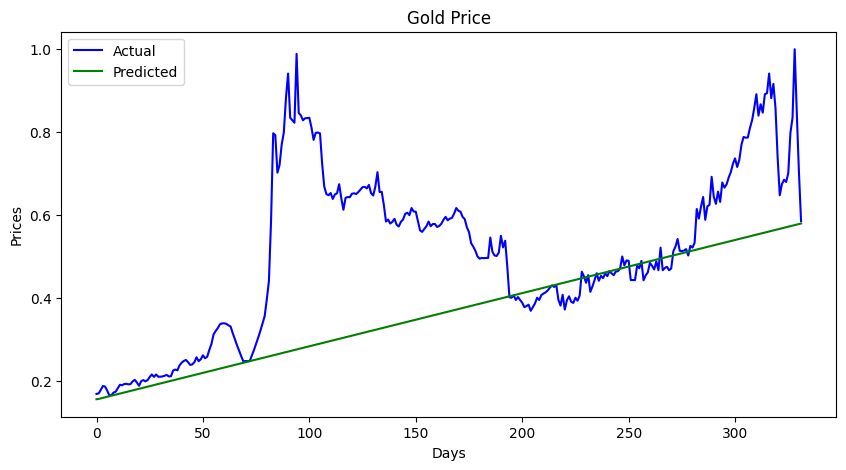

In [11]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Gold Price","Days","Prices")

In [12]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [13]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

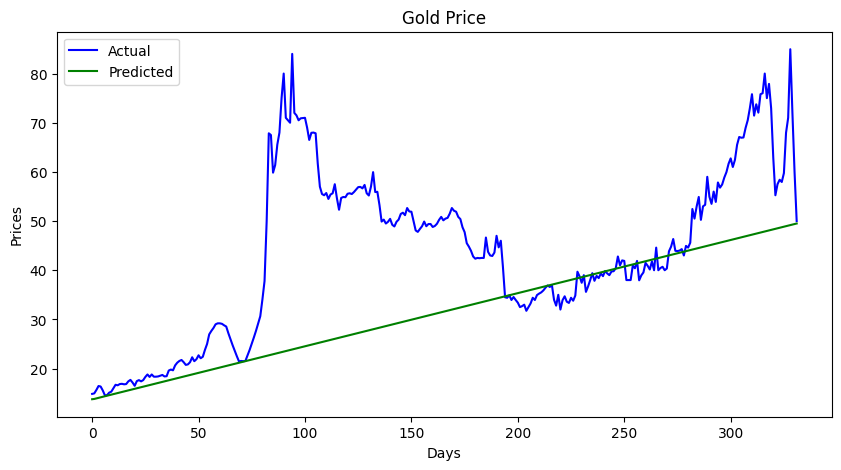

In [14]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Gold Price","Days","Prices")

In [15]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 18.369310357822997
maPe-Testset: 0.23623892311516806


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
forecast=model_fit.predict(len(data1), len(data1)+3)
forecast

array([0.58145145, 0.58273175, 0.58401206, 0.58529236])

In [17]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["HighFore"])
forecast_stock_price_test_ori=ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_orif=conversionSingle(forecast_stock_price_test_ori,["HighFore"])

In [18]:
forecast_stock_price_test_orif

,HighFore
0,49.611946
1,49.720042
2,49.828138
3,49.936234


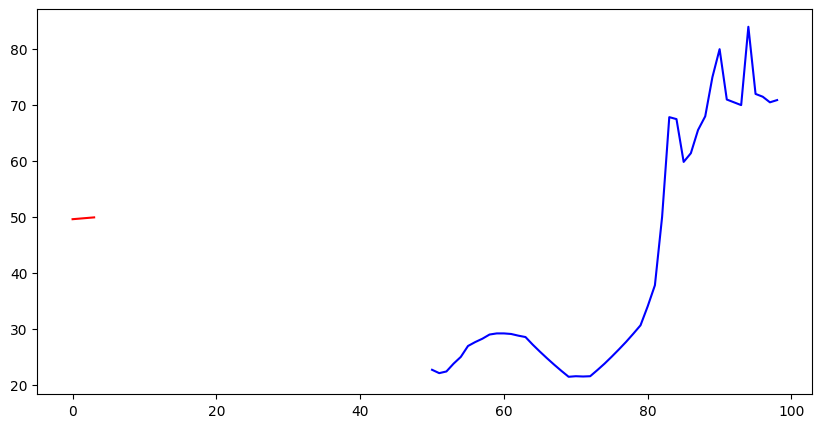

In [19]:

plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[50:99], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_orif, color = 'red', label ="Predicted")